In [1]:
import pandas as pd
%matplotlib inline
import numpy as np
import seaborn as sns

In [2]:
df= pd.read_excel("obese.xlsx")
df.head(5)

,height,weight,label,value
0,152.4,45.5,healthy,2
1,152.4,47.7,healthy,2
2,152.4,50.0,healthy,2
3,152.4,52.3,healthy,2
4,152.4,54.5,healthy,2


In [3]:
import matplotlib.pyplot as plt

C:\Users\lenovo\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\lenovo\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


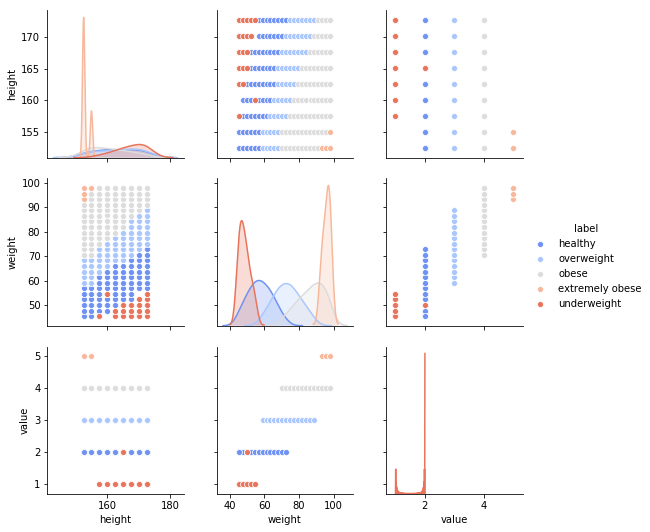

In [4]:
sns.pairplot(df,hue="label",palette="coolwarm")

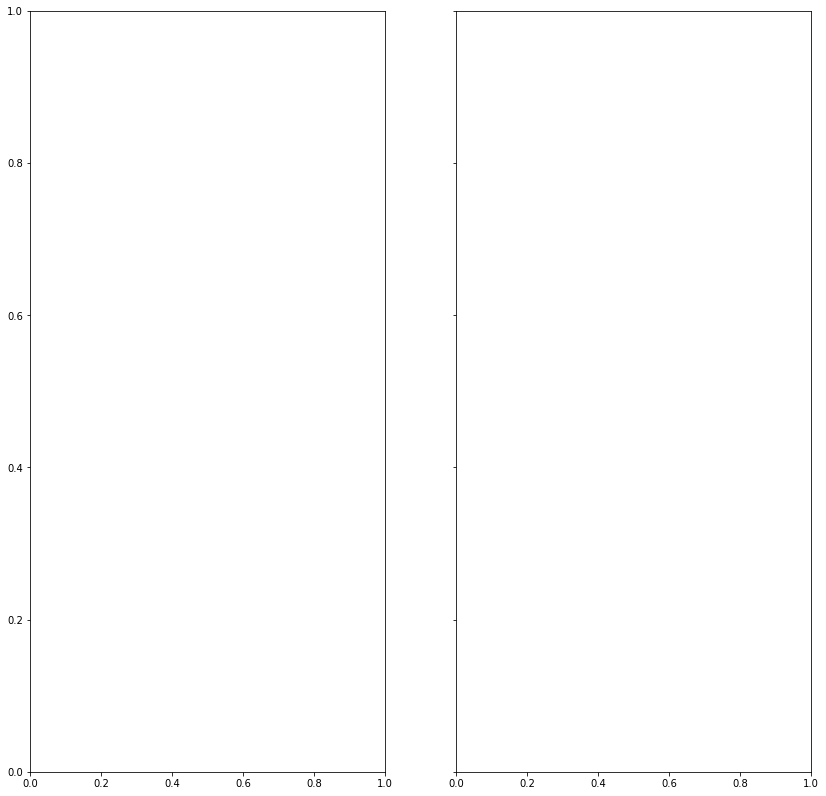

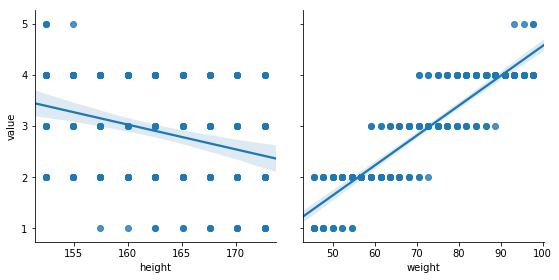

In [30]:
figure, (ax1, ax2)=plt.subplots(nrows=1,ncols=2,figsize=(14,14),sharey=True)
pp = sns.pairplot(data=df,y_vars=["value"],x_vars=["height","weight"],kind="reg",height=4)

In [31]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

X=df[["height","weight"]]
y=df["value"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)
classifier = xgb.sklearn.XGBClassifier(nthread=-1, seed=1)
classifier.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=-1, objective='multi:softprob',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=1, silent=None, subsample=1, verbosity=1)

In [32]:
from sklearn.metrics  import r2_score,explained_variance_score,mean_absolute_error

R^2 score: 0.95
MAE score: 0.05
EVS score: 0.96


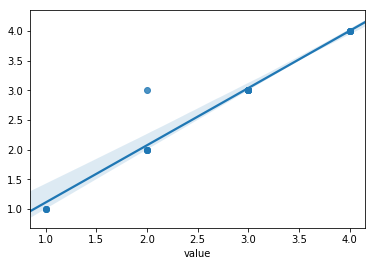

In [33]:
predictions = classifier.predict(X_test)
print(f'R^2 score: {r2_score(y_true=y_test, y_pred=predictions):.2f}')
print(f'MAE score: {mean_absolute_error(y_true=y_test, y_pred=predictions):.2f}')
print(f'EVS score: {explained_variance_score(y_true=y_test, y_pred=predictions):.2f}')
rp = sns.regplot(x=y_test, y=predictions)

In [34]:
import pickle
with open("bike_model_xgboost.pkl","wb") as file :
    pickle.dump(classifier,file)
    print("pickle file exported...")

pickle file exported...
